# Importing Essential Modules

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Analysing The Dataset

In [14]:
data=pd.read_csv('creditcard.csv')

In [15]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data.shape

(44395, 30)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144969 entries, 0 to 144968
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      144969 non-null  float64
 1   V2      144969 non-null  float64
 2   V3      144969 non-null  float64
 3   V4      144969 non-null  float64
 4   V5      144969 non-null  float64
 5   V6      144969 non-null  float64
 6   V7      144969 non-null  float64
 7   V8      144969 non-null  float64
 8   V9      144969 non-null  float64
 9   V10     144969 non-null  float64
 10  V11     144969 non-null  float64
 11  V12     144969 non-null  float64
 12  V13     144969 non-null  float64
 13  V14     144969 non-null  float64
 14  V15     144969 non-null  float64
 15  V16     144969 non-null  float64
 16  V17     144969 non-null  float64
 17  V18     144969 non-null  float64
 18  V19     144969 non-null  float64
 19  V20     144969 non-null  float64
 20  V21     144969 non-null  float64
 21  V22     14

In [17]:
data.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [18]:
distribution=data['Class'].value_counts()
percentage=data['Class'].value_counts(normalize=True)
show = pd.DataFrame({'count': distribution, 'Percentage': percentage})
print(show)

        count  Percentage
Class                    
0.0    144687    0.998062
1.0       281    0.001938


<Axes: xlabel='Class', ylabel='count'>

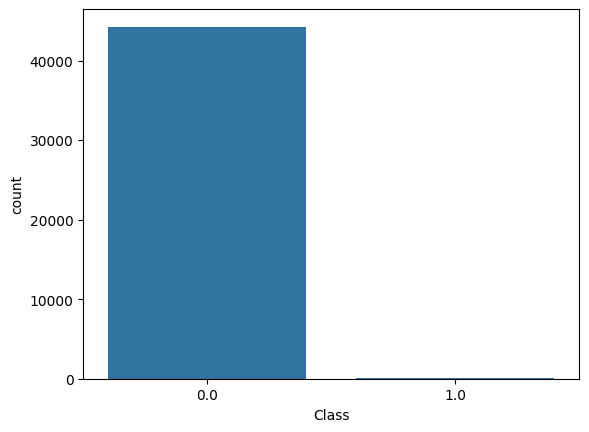

In [8]:
sns.countplot(x=data['Class'])

# Processing the Data

In [28]:
data = data.dropna(subset=['Class'])

In [30]:
data.groupby('Class',axis=1)

<ipython-input-30-3a044e49556e>:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby('Class',axis=1)


In [31]:
X=data.drop(columns='Class',axis=1)
Y=data['Class']

In [32]:
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

In [33]:
X_scaler

array([[-0.60936612, -0.06101804,  1.47127383, ...,  0.34193692,
        -0.07591769,  0.24103885],
       [ 0.79560647,  0.1491406 , -0.39707028, ..., -0.02460464,
         0.04111751, -0.35677337],
       [-0.60856605, -0.84687289,  0.86963522, ..., -0.14384306,
        -0.20250997,  1.17293097],
       ...,
       [-0.48662025,  0.94049286,  0.50984068, ..., -0.11392046,
         0.03113318, -0.36364945],
       [-0.75174883, -0.50964631,  1.02982877, ..., -0.54620017,
        -0.48958851, -0.32703126],
       [-0.29550931,  0.71880132, -0.39076404, ...,  0.42331757,
        -0.05808212,  0.04301584]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=42, stratify=Y)

over-sampling the data using SMOTE technique

In [35]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote,y_smote = over_sample.fit_resample(X_train, y_train)

<Axes: xlabel='Class', ylabel='count'>

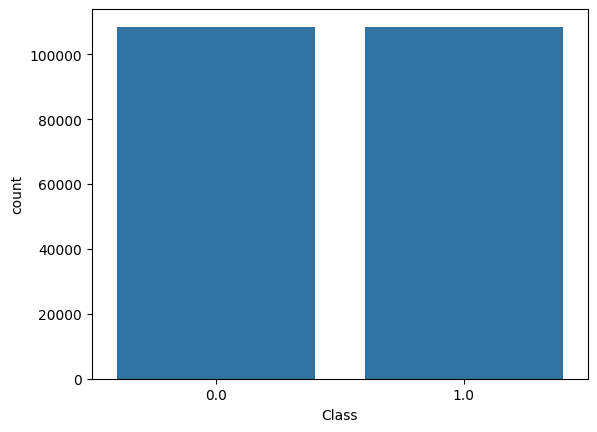

In [36]:
sns.countplot(x=y_smote)

In [37]:
percentages = y_smote.value_counts(normalize=True) * 100
print(percentages)

Class
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


# Training The models

In [38]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smote, y_smote, test_size= 0.25, random_state=42, stratify=y_smote)

## Logistic Regression

In [39]:
classifier=LogisticRegression()

In [40]:
classifier.fit(X_train_s,y_train_s)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
prediction= classifier.predict(X_test_s)

In [42]:
print(classification_report(y_test_s,prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     27129
         1.0       0.99      0.95      0.97     27129

    accuracy                           0.97     54258
   macro avg       0.97      0.97      0.97     54258
weighted avg       0.97      0.97      0.97     54258



In [43]:
print(accuracy_score(y_test_s,prediction))

0.9682811751262487


## Decision TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
d_tree_prediction = d_tree.predict(X_test_s)

In [48]:
print(accuracy_score(y_test_s,d_tree_prediction))

0.9452430977920306


## XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()

In [51]:
xgb.fit(X_train_s,y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
xgb_prediction = xgb.predict(X_test_s)

In [53]:
print(accuracy_score(y_test_s,xgb_prediction))

0.9998894172287958


# Saving The Model

In [54]:
import pickle

In [56]:
pickle.dump(xgb,open('xgb_model.sav','wb'))